In [103]:
# standard first block for defining the token and makinhg it available as a system variable for the session
# token must be replaced with new one once it has expired
token="ab2467e8fccd49cf8a52651dfef7f5b8"
import sys
sys.argv.append("--ident="+token)

In [104]:
import numpy as np
import pandas
from astropy.io import fits
import astropy
import bz2
import matplotlib.pyplot as plt
import skimage.io
import SciServer.CasJobs as CasJobs
import SciServer.SciDrive

In [105]:
query="""
select top 16 g.objId,g.ra,g.dec,g.petror90_r, dbo.fGetUrlFitsCFrame(F.FIELDiD,'r') as fieldURL
from galaxy g
  ,  field f
where f.run=g.run
  and f.camcol=g.camcol
  and f.field=g.field
  and f.rerun=g.rerun
"""
# query CasJobs table. Using DR12 as context
queryResponse = CasJobs.executeQuery(query, "DR12")
# parse results into pandas.DataFrame for further in memory processing
gals = pandas.read_csv(queryResponse,index_col=None)
gals['objId']=gals['objId'].astype(np.int64)

executeQuery POST response:  200 OK


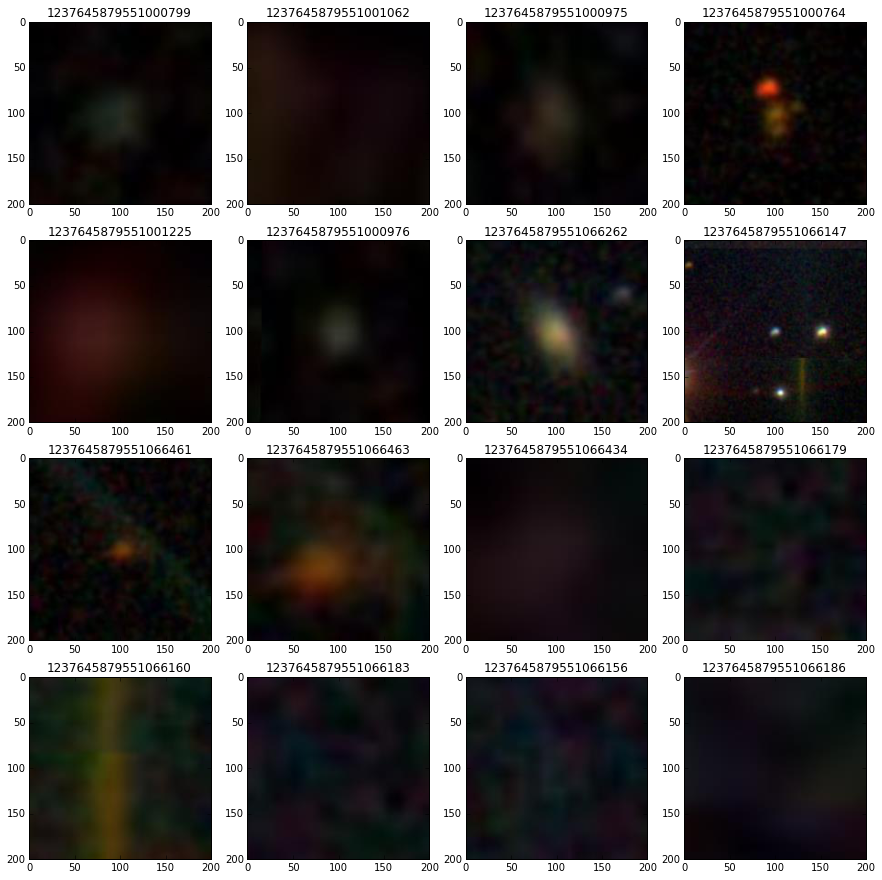

In [57]:
width=200
height=200
pixelsize=0.396
plt.figure(figsize=(15, 15))
subPlotNum = 1

for index,gal in gals.iterrows():
    scale=2*gal['petror90_r']/pixelsize/width
    url="http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx?ra="+str(gal['ra'])
    url+="&dec="+str(gal['dec'])+"&scale="""+str(scale)+"&width="+str(width)
    url+="&height="+str(height)
    img=skimage.io.imread(url)
    plt.subplot(4,4,subPlotNum)
    subPlotNum += 1
    plt.imshow(img)
    plt.title(gal['objId'])
#    write images to scidrive

# create container
    

In [106]:
#write images to scidrive
container = 'thumbs'
#SciServer.SciDrive.createContainer(container)
width=200
height=200
pixelsize=0.396

for index,gal in gals.iterrows():
    scale=2*gal['petror90_r']/pixelsize/width
    url="http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx?ra="+str(gal['ra'])
    url+="&dec="+str(gal['dec'])+"&scale="""+str(scale)+"&width="+str(width)
    url+="&height="+str(height)
    req = urllib.request.Request(url=url,method='GET')
    res = urllib.request.urlopen(req)
    data=res.read()
    scidrivename_name = container+"/"+str(gal['objId'])+".jpg"
    SciServer.SciDrive.upload(scidrivename_name, data)


{"size":"1.8 KB","rev":1,"thumb_exists":false,"bytes":1861,"modified":"Mon, 01 Feb 2016 16:23:57 -0500","path":"/thumbs/1237645879551000799.jpg","is_dir":false,"icon":"file","root":"dropbox","mime_type":"application/file"}
{"size":"1.6 KB","rev":1,"thumb_exists":false,"bytes":1624,"modified":"Mon, 01 Feb 2016 16:23:58 -0500","path":"/thumbs/1237645879551001062.jpg","is_dir":false,"icon":"file","root":"dropbox","mime_type":"application/file"}
{"size":"1.9 KB","rev":1,"thumb_exists":false,"bytes":1928,"modified":"Mon, 01 Feb 2016 16:23:59 -0500","path":"/thumbs/1237645879551000975.jpg","is_dir":false,"icon":"file","root":"dropbox","mime_type":"application/file"}
{"size":"3 KB","rev":1,"thumb_exists":false,"bytes":3118,"modified":"Mon, 01 Feb 2016 16:24:00 -0500","path":"/thumbs/1237645879551000764.jpg","is_dir":false,"icon":"file","root":"dropbox","mime_type":"application/file"}
{"size":"1.7 KB","rev":1,"thumb_exists":false,"bytes":1773,"modified":"Mon, 01 Feb 2016 16:24:01 -0500","path"